In [454]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import f1_score
import itertools

In [424]:
file_path = r"C:\Users\jens.nilsen\OneDrive - Bouvet Norge AS\Documents\GitHub\trfkaipoc\data_2022-2025.csv"
df = pd.read_csv(file_path, sep=";")

In [425]:
df = df[df["EGS.VEDTAK.10670"].notna()]

In [426]:
df['Avslag_ind'] = df['EGS.VEDTAK.10670'].apply(lambda x: 1 if x == "Avslag" else 0)

In [427]:
andel_avslag=df['Avslag_ind'].sum()/df['Avslag_ind'].count()

In [428]:
andel_avslag

0.0405982905982906

In [429]:
antall_avslag=df['Avslag_ind'].sum()

In [430]:
antall_avslag

19

In [431]:
features = [
    'Avslag_ind',
    "ÅDT, total",
    "ÅDT, andel lange kjøretøy",
    "Fartsgrense",
    "Avkjørsel, holdningsklasse",
    "Funksjonsklasse",
    "Avkjørsler",
    "Trafikkulykker",
    "EGS.BRUKSOMRÅDE.1256", 
    "Kurvatur, horisontal", 
    "Kurvatur, stigning"
]

# Encode categorical features
df_encoded = pd.get_dummies(df[features])

In [432]:
df_encoded=df_encoded.dropna()

In [433]:
df_encoded

,Avslag_ind,"ÅDT, total","ÅDT, andel lange kjøretøy",Fartsgrense,Avkjørsler,Trafikkulykker,"Kurvatur, horisontal","Kurvatur, stigning","Avkjørsel, holdningsklasse_Lite streng","Avkjørsel, holdningsklasse_Meget streng",...,EGS.BRUKSOMRÅDE.1256_Dyrkamark/jordbruk,EGS.BRUKSOMRÅDE.1256_Forretning,EGS.BRUKSOMRÅDE.1256_Fritidsaktivitet,EGS.BRUKSOMRÅDE.1256_Gardsbruk,EGS.BRUKSOMRÅDE.1256_Hytte,EGS.BRUKSOMRÅDE.1256_Industri,EGS.BRUKSOMRÅDE.1256_Naust,EGS.BRUKSOMRÅDE.1256_Service,EGS.BRUKSOMRÅDE.1256_Skog/skogbruk,EGS.BRUKSOMRÅDE.1256_Skole/Barnehage
0,0,550.0,11.0,80.0,11,1,-405.0,-0.5,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,293.0,7.0,60.0,8,1,-415.0,-1.0,True,False,...,False,False,False,False,False,False,True,False,False,False
2,0,1500.0,13.0,80.0,2,4,182.0,0.7,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,15000.0,6.0,50.0,9,50,99999.0,-0.3,False,False,...,False,True,False,False,False,False,False,False,False,False
4,0,2980.0,12.0,80.0,5,8,99999.0,2.4,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1,1300.0,6.0,30.0,21,0,-1520.0,-0.5,True,False,...,False,False,False,False,False,False,False,False,False,False
464,0,500.0,10.0,60.0,12,2,-1119.0,0.2,False,False,...,False,False,False,True,False,False,False,False,False,False
465,0,400.0,13.0,60.0,12,0,-192.0,5.5,False,False,...,False,False,False,False,False,False,False,False,False,False
466,0,1600.0,15.0,80.0,8,6,-524.0,-3.0,False,False,...,False,False,False,False,False,False,False,False,True,False


In [434]:
y = df_encoded['Avslag_ind']        # target
X = df_encoded.drop(columns=['Avslag_ind'])  # all other columns

In [435]:
import itertools
import pandas as pd
import numpy as np

interactions_3way = {}

df_num = df_num.copy()

# Use only columns that exist and have variance
valid_cols = [c for c in X.columns if c in df_num.columns and df_num[c].std() > 0]

# Create 3-way interactions
for f1, f2, f3 in itertools.combinations(valid_cols, 3):
    col_name = f"{f1}_x_{f2}_x_{f3}"
    # Compute product safely
    df_num.loc[:, col_name] = df_num[f1] * df_num[f2] * df_num[f3]
    corr_val = df_num[col_name].corr(y)
    if not np.isnan(corr_val):  # skip NaNs
        interactions_3way[col_name] = corr_val

# Sort by absolute correlation
interactions_3way_sorted = dict(
    sorted(interactions_3way.items(), key=lambda item: abs(item[1]), reverse=True)
)

print("Top 10 three-way interactions by correlation with Avslag_ind:")
for k, v in list(interactions_3way_sorted.items())[:10]:
    print(f"{k}: {v:.4f}")

# Take the top features (only if any exist)
top_features = list(interactions_3way_sorted.keys())[:10]
if top_features:
    X = pd.concat([X, df_num[top_features]], axis=1)
    print(f"\n✅ Added {len(top_features)} three-way interaction features to X.")
    print("New shape of X:", X.shape)

    print("\n📊 Names of added features:")
    for name in top_features:
        print(f" • {name}")
else:
    print("\n⚠️ No valid three-way interactions found (all correlations were NaN or zero).")


Top 10 three-way interactions by correlation with Avslag_ind:
ÅDT, total_x_ÅDT, andel lange kjøretøy_x_Fartsgrense: -0.0646
Fartsgrense_x_Avkjørsler_x_Trafikkulykker: -0.0463
ÅDT, total_x_ÅDT, andel lange kjøretøy_x_Trafikkulykker: -0.0370
ÅDT, andel lange kjøretøy_x_Avkjørsler_x_Trafikkulykker: -0.0362
ÅDT, andel lange kjøretøy_x_Trafikkulykker_x_Kurvatur, stigning: 0.0358
ÅDT, total_x_Fartsgrense_x_Trafikkulykker: -0.0347
Fartsgrense_x_Trafikkulykker_x_Kurvatur, stigning: 0.0328
ÅDT, total_x_Fartsgrense_x_Avkjørsler: -0.0306
Avkjørsler_x_Trafikkulykker_x_Kurvatur, stigning: 0.0302
ÅDT, total_x_Fartsgrense_x_Kurvatur, horisontal: -0.0301

✅ Added 10 three-way interaction features to X.
New shape of X: (456, 36)

📊 Names of added features:
 • ÅDT, total_x_ÅDT, andel lange kjøretøy_x_Fartsgrense
 • Fartsgrense_x_Avkjørsler_x_Trafikkulykker
 • ÅDT, total_x_ÅDT, andel lange kjøretøy_x_Trafikkulykker
 • ÅDT, andel lange kjøretøy_x_Avkjørsler_x_Trafikkulykker
 • ÅDT, andel lange kjøretøy_x_

In [436]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [438]:
# Fit logistic regression
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [439]:
yps=model.predict_proba(X_test)

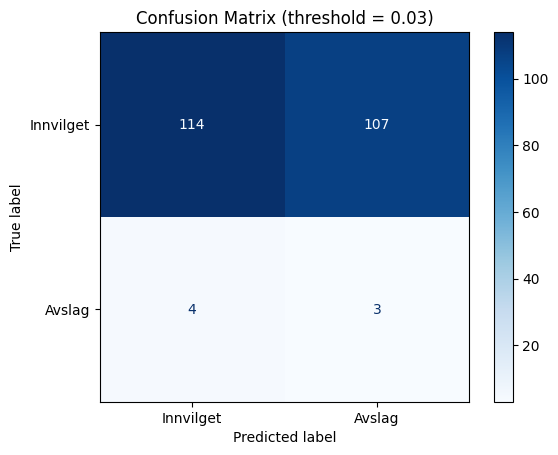

In [440]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicted probabilities for class "1"
y_prob = yps[:, 1]

# Adjustable threshold
threshold = 0.03  # 👈 change this value between 0 and 1

# Convert probabilities to class predictions
y_pred = (y_prob >= threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Innvilget", "Avslag"])

# Plot
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (threshold = {threshold})")
plt.show()

In [441]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [442]:
yps=model.predict_proba(X_test)

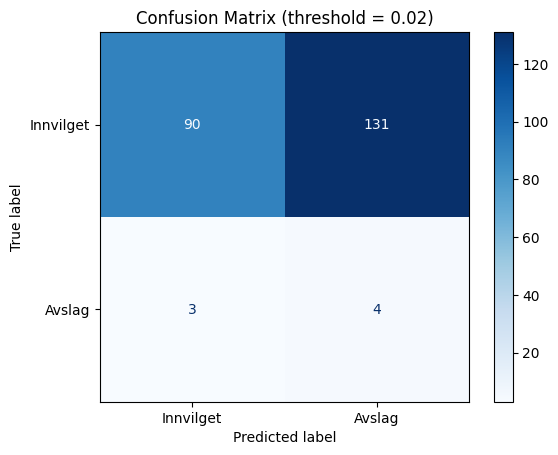

In [447]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicted probabilities for class "1"
y_prob = yps[:, 1]

# Adjustable threshold
threshold = 0.02 # 👈 change this value between 0 and 1

# Convert probabilities to class predictions
y_pred = (y_prob >= threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Innvilget", "Avslag"])

# Plot
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (threshold = {threshold})")
plt.show()

In [455]:
f1_score(y_pred,y_test)

0.056338028169014086

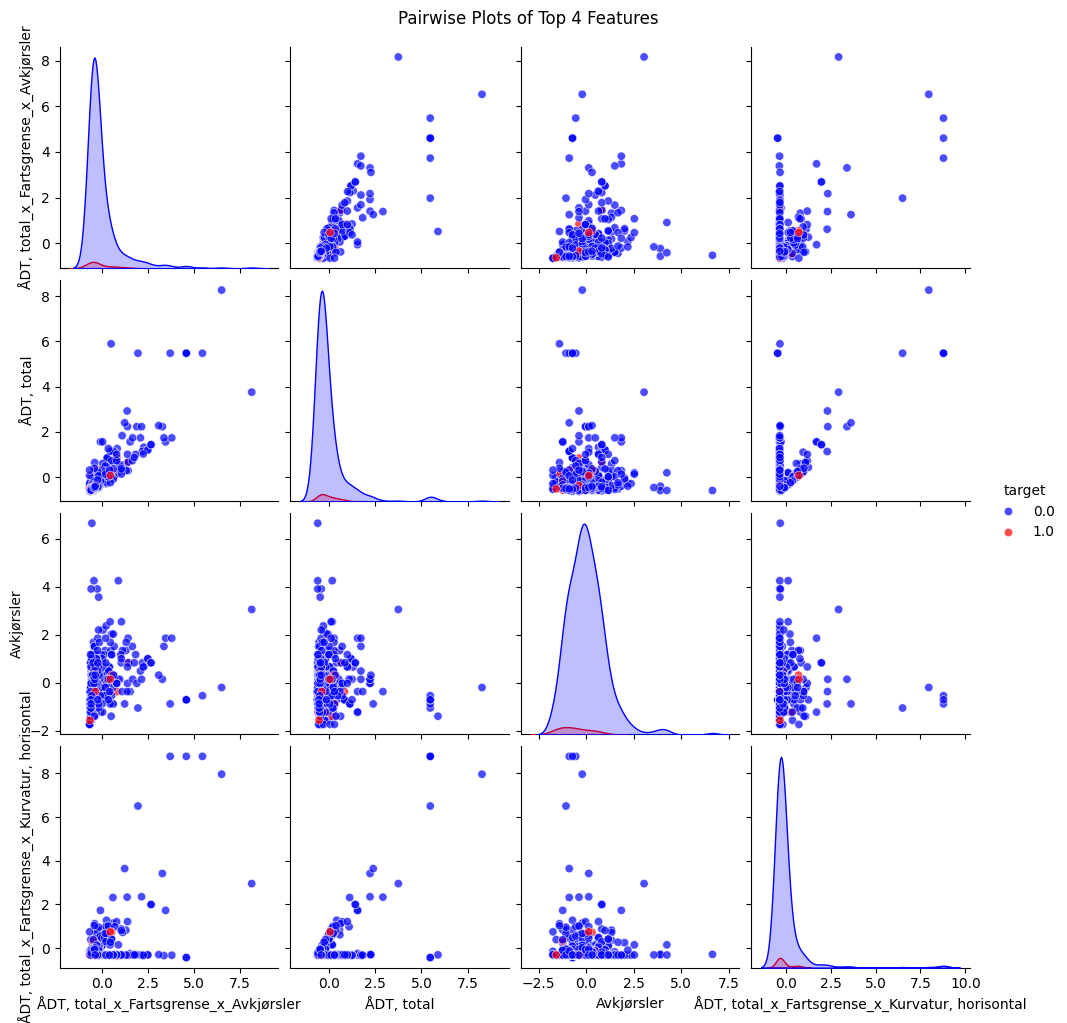

In [444]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 4 features
top_features = importances_sorted.index[:4]

# Subset data
X_top = X[top_features].copy()
X_top['target'] = y  # add the target

# Pairwise scatter plots
sns.pairplot(
    X_top,
    vars=top_features,
    hue='target',            # color by target
    palette={0: "blue", 1: "red"}, 
    plot_kws={'alpha': 0.7}
)
plt.suptitle("Pairwise Plots of Top 4 Features", y=1.02)
plt.show()

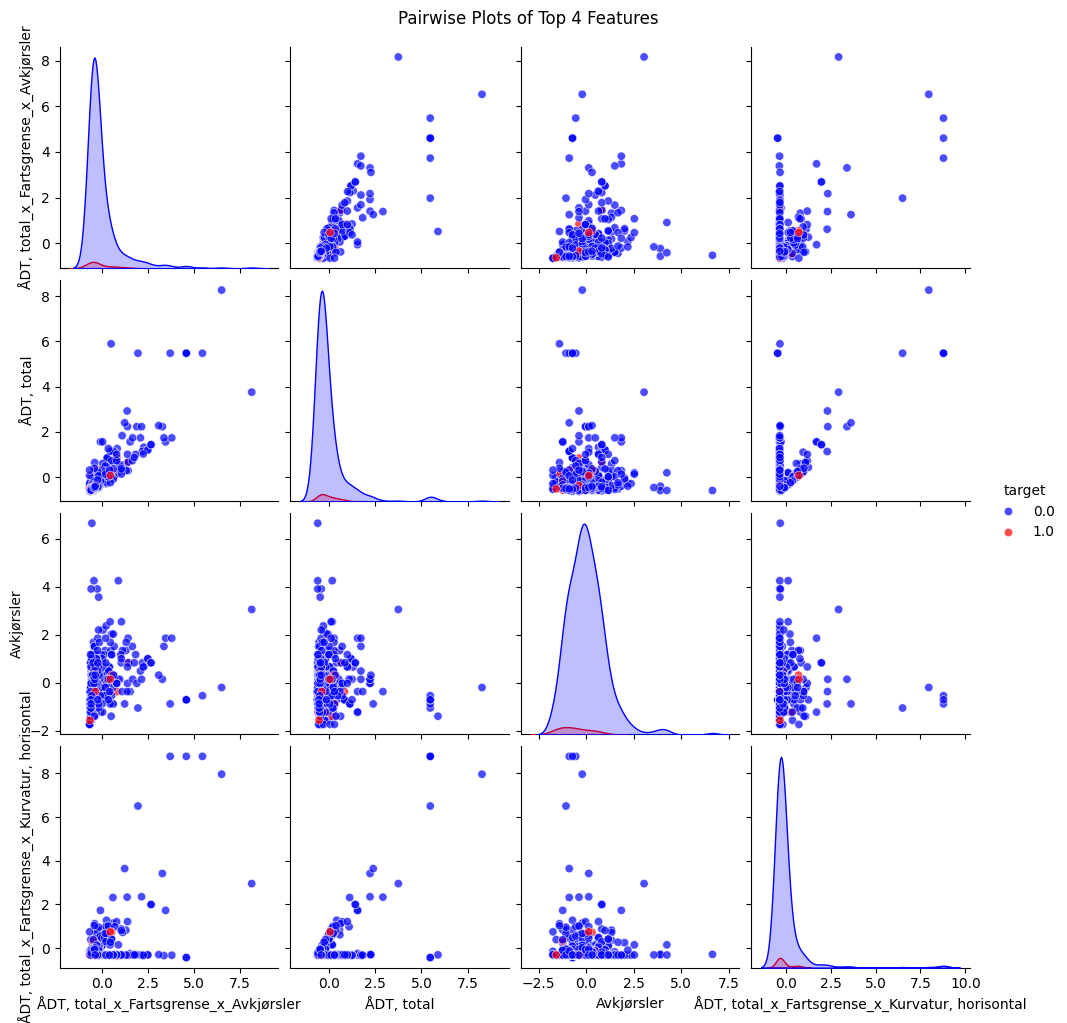

In [445]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 4 features
top_features = importances_sorted.index[:4]

# Subset data
X_top = X[top_features].copy()
X_top['target'] = y  # add the target

# Pairwise scatter plots
sns.pairplot(
    X_top,
    vars=top_features,
    hue='target',            # color by target
    palette={0: "blue", 1: "red"}, 
    plot_kws={'alpha': 0.7}
)
plt.suptitle("Pairwise Plots of Top 4 Features", y=1.02)
plt.show()